In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [34]:
training_tsv = 'essays/training_set_rel3.tsv'
valid_tsv = 'essays/valid_set.tsv'
test_tsv = 'essays/test_set.tsv'

df_params = {'delimiter': '\t', 'encoding': 'ansi'}


In [35]:

df_training = pd.read_csv(training_tsv, **df_params)
df_valid = pd.read_csv(valid_tsv, **df_params)
df_test = pd.read_csv(test_tsv, **df_params)

df_training.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def remove_unneeded(df):
    df = df[['essay_id', 'essay_set', 'essay', 'domain1_score',]]
    return df

# Apply the function to df
df_training = remove_unneeded(df_training)
print(df_training.info())
print(df_training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 4 columns):
essay_id         12976 non-null int64
essay_set        12976 non-null int64
essay            12976 non-null object
domain1_score    12976 non-null int64
dtypes: int64(3), object(1)
memory usage: 405.6+ KB
None
   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   domain1_score  
0              8  
1              9  
2              7  
3             10  
4              8  


In [37]:
import re
def add_dense_sparse_features(df):
    # refer to kenton murray papers
    essay = df['essay']
    df['char_count'] = essay.apply(len)
    df['words'] = essay.apply(lambda x: len(re.split(r'\W+', x)))
    return df

# Apply function to df
df_training = add_dense_sparse_features(df_training)
print(df_training.info())
print(df_training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 6 columns):
essay_id         12976 non-null int64
essay_set        12976 non-null int64
essay            12976 non-null object
domain1_score    12976 non-null int64
char_count       12976 non-null int64
words            12976 non-null int64
dtypes: int64(5), object(1)
memory usage: 608.3+ KB
None
   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   domain1_score  char_count  words  
0              8        1875    351  
1              9        2288    424  
2              7        1541 

In [38]:
# Normalize score data

def normalize_score(df):
    print('Before')
    print(df['domain1_score'].head())
    print(df.describe())
    
    max_scores = dict()
    ##################OPTIMIZE########VERY SLOW########
    for _, row in df.iterrows():
        essay_set = row['essay_set']
        _sliced = df[df['essay_set'] == essay_set]
        max_scores[essay_set] = max(_sliced['domain1_score'] )

    
    print(type(df))
    df['domain1_score'] = df.apply(axis=1, func=lambda row: row['domain1_score'] / max_scores[row['essay_set']])
    print(type(df))
    print('MAX SCORES', max_scores)
    
    return df
df_training = normalize_score(df_training)
print('After')
print(df_training.head())
print(df_training.describe())

Before
0     8
1     9
2     7
3    10
4     8
Name: domain1_score, dtype: int64
           essay_id     essay_set  domain1_score    char_count         words
count  12976.000000  12976.000000   12976.000000  12976.000000  12976.000000
mean   10295.395808      4.179485       6.800247   1216.011714    226.447904
std     6309.074105      2.136913       8.970705    958.322588    178.745201
min        1.000000      1.000000       0.000000      8.000000      2.000000
25%     4438.750000      2.000000       2.000000    527.000000    100.000000
50%    10044.500000      4.000000       3.000000    901.000000    166.000000
75%    15681.250000      6.000000       8.000000   1670.000000    312.000000
max    21633.000000      8.000000      60.000000   6098.000000   1069.000000
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
MAX SCORES {1: 12, 2: 6, 3: 3, 4: 3, 5: 4, 6: 4, 7: 24, 8: 60}
After
   essay_id  essay_set                                              essay  \
0   

In [39]:
######## START ACTUAL ML
X = df_training[['char_count', 'words']]
y = df_training['domain1_score']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

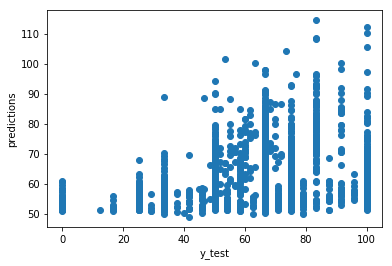

In [63]:
predictions = lm.predict(X_test)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.scatter(y_test*100,predictions*100)


C:\Users\Vinay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


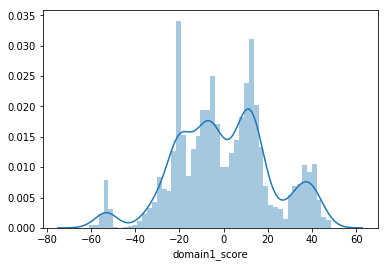

In [64]:
sns.distplot((y_test-predictions)*100,bins=50);

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17560506585394015
MSE: 0.047116523201735545
RMSE: 0.21706340825144976
